In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "drive/MyDrive/Colab\ Notebooks/text_classification"
% cd $path
! pwd

/content/drive/MyDrive/Colab Notebooks/text_classification
/content/drive/MyDrive/Colab Notebooks/text_classification


In [ ]:
! pip install konlpy

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import json
import pandas as pd
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도

from konlpy.tag import Okt
from collections import Counter
import os.path
import re
import seaborn as sns
%matplotlib inline

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
okt = Okt()
# Preprocess Data
def clean_words(x):
    x = re.sub(r'^https?:\/\/.*[\r\n]*', '', x) # remove link
    x = re.sub(r'[@%\\*=)~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\•\]]', '',x) #remove punctuation
    # x = re.sub(r'[/(\[]', ' ',x) # add a space with opening bracket or slash
    # x = re.sub(r'\b\w\b', '',x)
    x = re.sub(r'\s+', ' ', x) #remove spaces 
    x = re.sub(r"^\s+", '', x) #remove space from start 
    x = re.sub(r'\s+$', '', x) #remove space from the end
    x = re.sub(r'\d+','', x)# remove number 
    x = x.lower() #lower case 
    x = re.sub(r'<[^>]+>','', x) #remove Html tags 
    return x

def split_text(x):
    STOP_WORDS = ["대한", "있는", "으로", "있으신", "하고", "또는", "에서", "하신", "하여", "합니다", "혹은"]
    x = clean_words(x)
    x = okt.morphs(x)
    x = list(set(x))
    return [a for a in x if len(a) > 1 and a not in STOP_WORDS]

In [ ]:
df = pd.read_json("jd_7632.json", encoding="utf-8", dtype={"wd_id": int, "position": str, "main_tasks": str, "requirements" : str, "preferred_points": str, "category": str})
feature_cols = ["position", "main_tasks", "requirements", "preferred_points"]
label = ["category"]

In [ ]:
df_clean = df.copy()
df_clean["text_sum"] = df_clean[feature_cols].sum(axis=1)
df_clean["text_sum"] = df_clean["text_sum"].apply(clean_words)
df_clean = df_clean[["text_sum", "category"]]
# bottleneck, takes ~3 mins for 8000 rows
df_clean["text_sum_tokenized"] = df_clean["text_sum"].apply(split_text)

In [ ]:
# luse_saved_file = False
# if os.path.isfile('clean_df.csv'):
#   df = pd.read_csv('clean_df.csv', usecols= ["wd_id", "position", "main_tasks", "requirements", "preferred_points", "category"])
#   use_saved_file = True
# else:
#   df = pd.read_json("jd_7632.json", encoding="utf-8", dtype={"wd_id": int, "position": str, "main_tasks": str, "requirements" : str, "preferred_points": str, "category": str})
# if not use_saved_file:
#   for col in feature_cols:
#   #   df[col] = df[col].apply(clean_words)
#   # for col in feature_cols:
#     df[col] = df[col].apply(split_text)
#   df.to_csv('clean_df.csv')
# else:
#   for col in feature_cols:
#     df[col] = df[col].apply(lambda x: x.replace("'", ""))
#     df[col] = df[col].apply(lambda x: x[1:-1].split(','))
#     df[col] = df[col].apply(lambda x: [y.strip() for y in x])

#     # df[col] = df[col].apply(lambda x: x.)


In [ ]:
def plot_word_frequency_per_cat(df, n = 50, descending= True, colname="text_sum_tokenized"):
  cats = df.category.unique()
  for cat in cats:
    d = Counter(df.loc[df.category == cat][colname].sum()).most_common()
    c =  d[:n] if descending else d[-n:]
    cw = "많이" if descending else "적게"
    word = [x[0] for x in c]
    occ = [x[1] for x in c]
    plt.figure(figsize=(30,10))
    plt.title(f"{cat}에 가장 {cw} 나타난 단어")
    plt.bar(word, occ, align="center")
    plt.show()


def plot_len_per_cat(df):
  # for cat in cats:
  a = df.copy()
  a["text_sum_tokenized"] = a.text_sum_tokenized.apply(lambda x: len(x))
  g = sns.displot(a, x="text_sum_tokenized", hue="category", multiple="stack")
  # g.set(xlim=(0,400))
  plt.title(f"게시글 카테고리 별 단어 수 분포도")
  plt.show(g)
  # plt.legend()
  # plt.xlabel('단어 수')
  # plt.ylabel('샘플 수')
  # plt.show()


In [ ]:
max_text_len = max(len(l) for l in df_clean.text_sum_tokenized)
average_text_len = sum(map(len, df_clean.text_sum_tokenized)) / len(df_clean)
print(max_text_len, average_text_len)

636 63.74764150943396


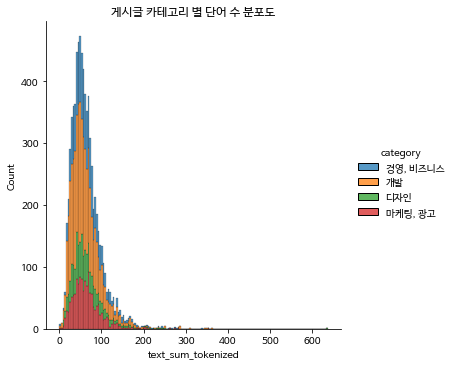

In [ ]:
plot_len_per_cat(df_clean)

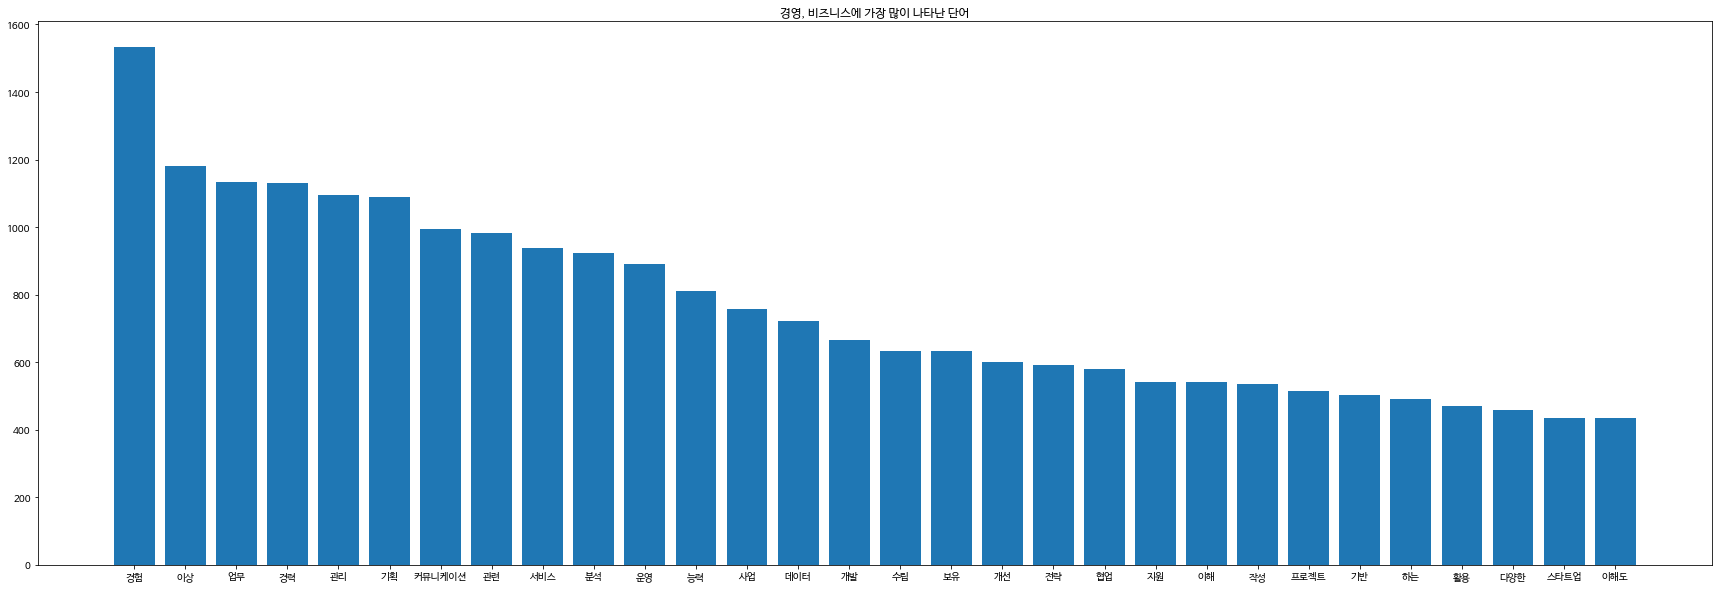

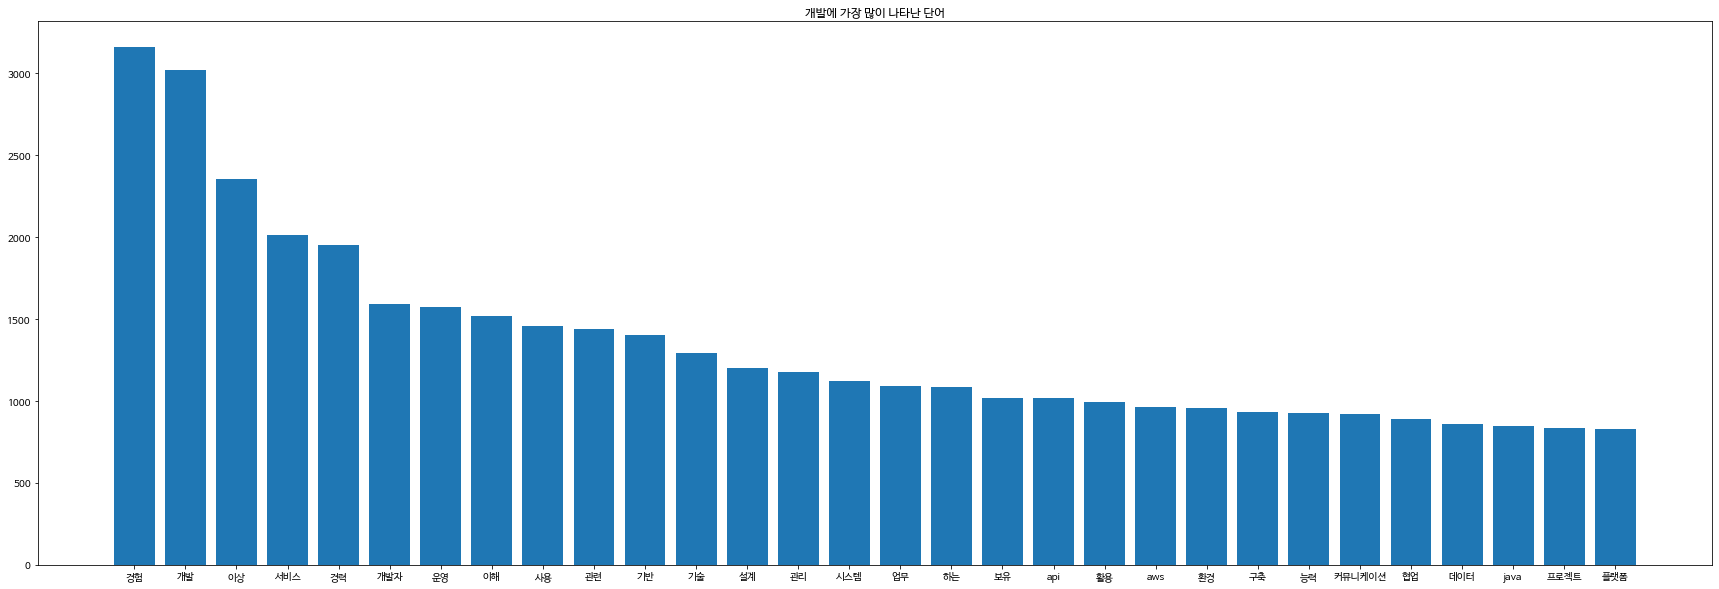

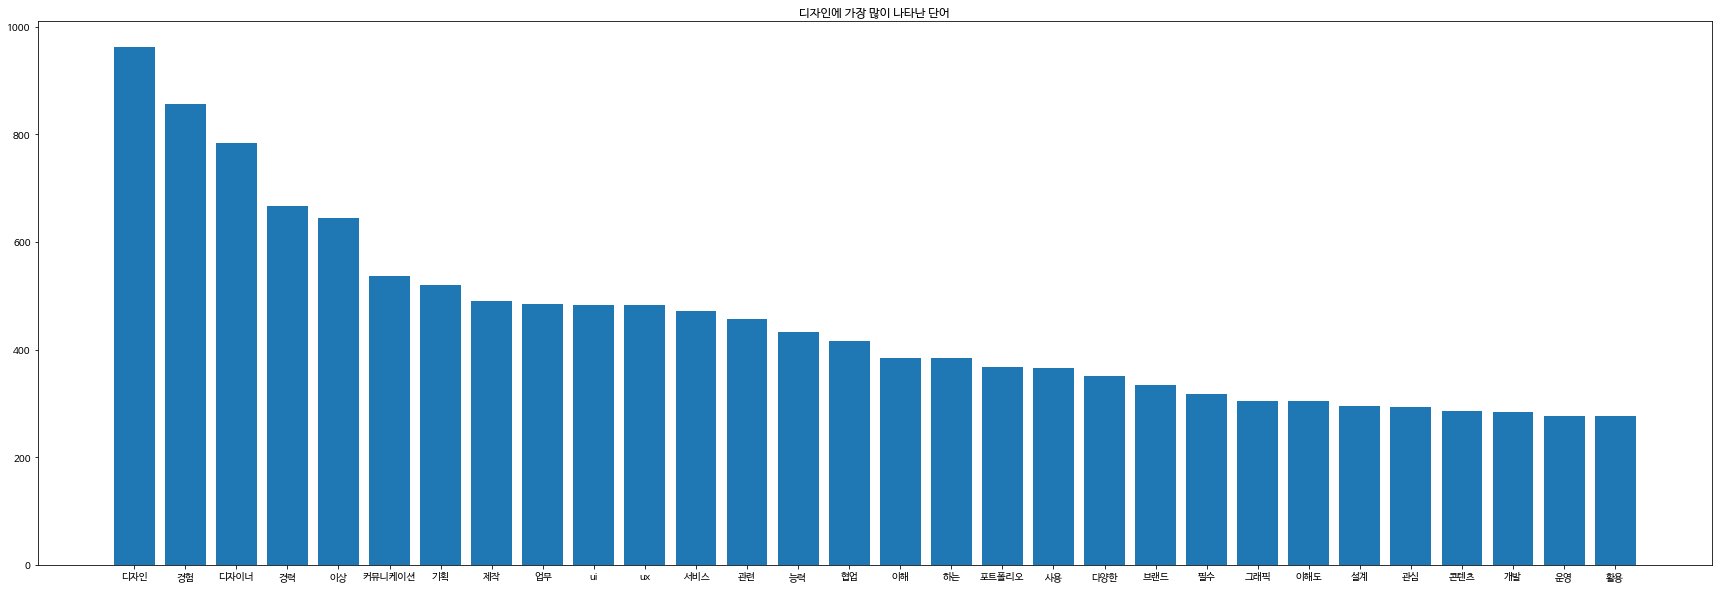

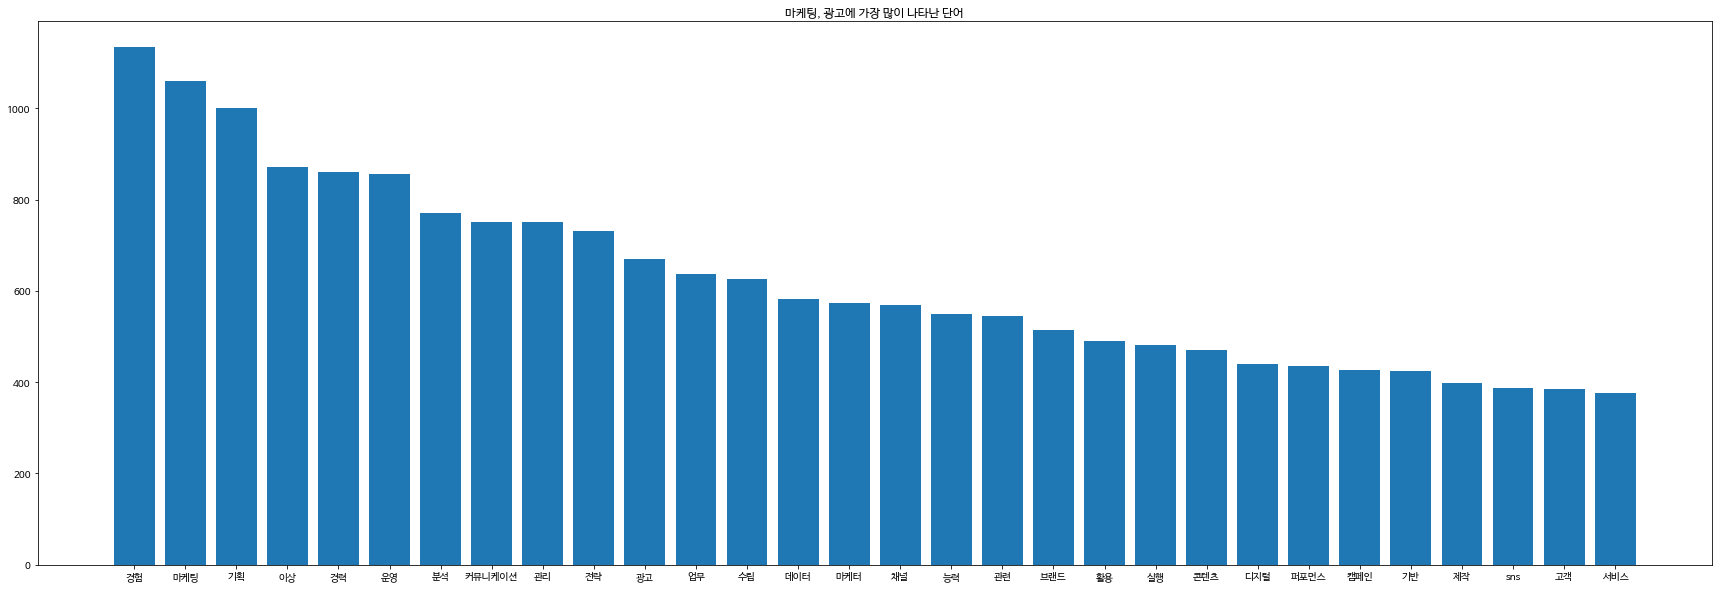

In [ ]:
plot_word_frequency_per_cat(df_clean, descending=True, n = 30)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Conv1D, MaxPool1D, BatchNormalization, Activation
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import pickle

In [ ]:
sentences = df_clean.text_sum_tokenized.values
data_y = to_categorical(df_clean.category.replace(cat_to_index).values)

In [ ]:
num_words = 5000
tokenizer = Tokenizer(num_words= num_words, oov_token='oov')
tokenizer.fit_on_texts(sentences)
len_word_index = len(tokenizer.word_index)
print(len_word_index)

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

19087


In [ ]:
data_X = np.array(tokenizer.texts_to_sequences(sentences), dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.20, random_state=42)

In [ ]:
print( len(X_train), len(y_train), len(X_test), len(y_test))

6105 6105 1527 1527


In [ ]:
max_len = 400
X_train = pad_sequences(X_train, maxlen=max_len) # 훈련용 뉴스 기사 패딩
X_test = pad_sequences(X_test, maxlen=max_len) # 테스트용 뉴스 기사 패딩

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6105, 400) (6105, 4) (1527, 400) (1527, 4)


In [ ]:
model = Sequential()
model.add(Embedding(num_words, 16))
# model.add(Conv1D(filters=8, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool1D(pool_size=2))
model.add(LSTM(16, dropout=0.2))

model.add(Dense(4, activation='softmax'))
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
opt = Adam(learning_rate=3e-4)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_34 (Embedding)     (None, None, 16)          80000     
_________________________________________________________________
batch_normalization_30 (Batc (None, None, 16)          64        
_________________________________________________________________
activation_28 (Activation)   (None, None, 16)          0         
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, None, 16)          0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 68        
Total params: 82,244
Trainable params: 82,212
Non-trainable params: 32
________________________________________________

In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=50, callbacks=[es, mc], validation_data=(X_test, y_test))

Epoch 1/50
96/96 [==============================] - 6s 44ms/step - loss: 1.2676 - acc: 0.4503 - val_loss: 1.3529 - val_acc: 0.4361

Epoch 00001: val_acc improved from -inf to 0.43615, saving model to best_model.h5
Epoch 2/50
96/96 [==============================] - 4s 38ms/step - loss: 1.0122 - acc: 0.5977 - val_loss: 1.2970 - val_acc: 0.5115

Epoch 00002: val_acc improved from 0.43615 to 0.51146, saving model to best_model.h5
Epoch 3/50
96/96 [==============================] - 4s 38ms/step - loss: 0.7642 - acc: 0.6937 - val_loss: 1.1614 - val_acc: 0.6686

Epoch 00003: val_acc improved from 0.51146 to 0.66863, saving model to best_model.h5
Epoch 4/50
96/96 [==============================] - 4s 38ms/step - loss: 0.6163 - acc: 0.7741 - val_loss: 0.9515 - val_acc: 0.8304

Epoch 00004: val_acc improved from 0.66863 to 0.83039, saving model to best_model.h5
Epoch 5/50
96/96 [==============================] - 4s 38ms/step - loss: 0.5120 - acc: 0.8246 - val_loss: 0.6850 - val_acc: 0.8513

Epo

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

48/48 [==============================] - 1s 14ms/step - loss: 0.2813 - acc: 0.9253

 테스트 정확도: 0.9253


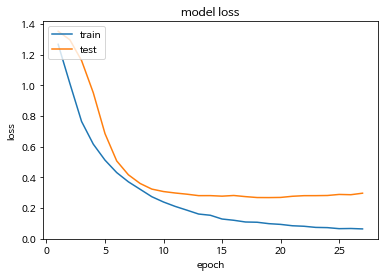

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
def predict_from_raw(text):
  t = tokenizer.texts_to_sequences([text])
  padded = pad_sequences(t, maxlen=max_len)
  res =index_to_cat[np.argmax(loaded_model.predict(padded))]
  return res

In [ ]:
test1 = """
담당업무
- 프론트엔드 코딩 및 개발
- 셀립 입주마케팅을 위한 광고 페이지 퍼블리싱
- 기획팀, 디자인팀, 마케팅 팀과의 협업을 통해 가장 효율적 시스템 구성

자격요건
- 경력 : 해당 분야 경력 3년 이상
- HTML/CSS/Javascript(JQuery)/플러그인활용
- 모바일 웹 및 반응형 웹 작업 경험자 
- 웹표준 및 웹접근성, 크로스브라우징 
"""


In [ ]:
design = """
[국내 광고대행사] 디자이너 채용 (사원~대리급)
* 국내 광고대행사에서 디자이너를 채용 중에 있습니다.
[담당업무]
- 고객사 캠페인 관련 전반적인 디자인 (캠페인 페이지, 배너 등)
- 디자인 운영 및 유지관리
- 그래픽 및 서비스 디자인
- 유관업무 2~3년 이상 경력자
- 디자인 툴 사용이 능숙하신 분 (Photoshop, Illustrator 등)
- 그래픽, 일러스트 등 비주얼 제작에 탁월한 감각인 있는 분
- 원활한 커뮤니케이션 능력 및 유연한 사고 보유자
- 에이전시 경력자 우대
"""

pm = """
서비스 기획/PM
Web, Mobile 서비스 기획 업무를 수행하며 개발자 및 UI/UX디자이너, CS담당자, 마케팅 담당자를 포함한 구성원들과 협업합니다.

고객 Needs 데이터를 수집, 분석하여 해당 데이터를 바탕으로 서비스의 개발 방향 및 일정을 수립합니다.

업무 수행에 필요하다고 판단되거나 업무 수행을 위하여 요청하는 모든 권한을 적극적으로 할당해 드립니다.
ㆍWeb, Mobile 서비스 기획
ㆍ스토리보드 작성
ㆍ서비스 및 정책 수립
ㆍ플랫폼 기획
ㆍ사용자 Needs 데이터 수집 및 분석
ㆍ서비스 세부 기획
ㆍ와이어프레임 및 스토리보드 작성
ㆍ경력 : 경력 2년 이상
ㆍ모바일 또는 플랫폼 서비스기획/PM 경력자
ㆍ효과적인 커뮤니케이션 능력자 우대
ㆍ기획 출시, 성장을 경험한 자 우대
"""

In [ ]:
predict_from_raw(test1)

'개발'